<a href="https://colab.research.google.com/github/Viny2030/NLP/blob/main/sentiment_analysis_python_youtube_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis in Python

This notebook is part of a tutorial that can be found on my [youtube channel here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw), please check it out!

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

Este cuaderno es parte de un tutorial que se puede encontrar en mi canal de YouTube aquí, ¡por favor, échale un vistazo!

En este cuaderno haremos un análisis de sentimientos en Python utilizando dos técnicas diferentes:

Vader (Diccionario ABSIENTO DE VALENCIA y razonador de sentimientos) - Enfoque de la bolsa de palabras
Modelo de petróleo de Roberta de 🤗
Tubería de la cara de abrazo


# Step 0. Read in Data and NLTK Basics

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [54]:
# Read in data
df = pd.read_csv('/content/drive/MyDrive/UNED/notebooks/Hotel_Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(515738, 17)
(500, 17)


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               500 non-null    object 
 1   Additional_Number_of_Scoring                500 non-null    int64  
 2   Review_Date                                 500 non-null    object 
 3   Average_Score                               500 non-null    float64
 4   Hotel_Name                                  500 non-null    object 
 5   Reviewer_Nationality                        500 non-null    object 
 6   Negative_Review                             500 non-null    object 
 7   Review_Total_Negative_Word_Counts           500 non-null    int64  
 8   Total_Number_of_Reviews                     500 non-null    int64  
 9   Positive_Review                             500 non-null    object 
 10  Review_Total_P

## Quick EDA

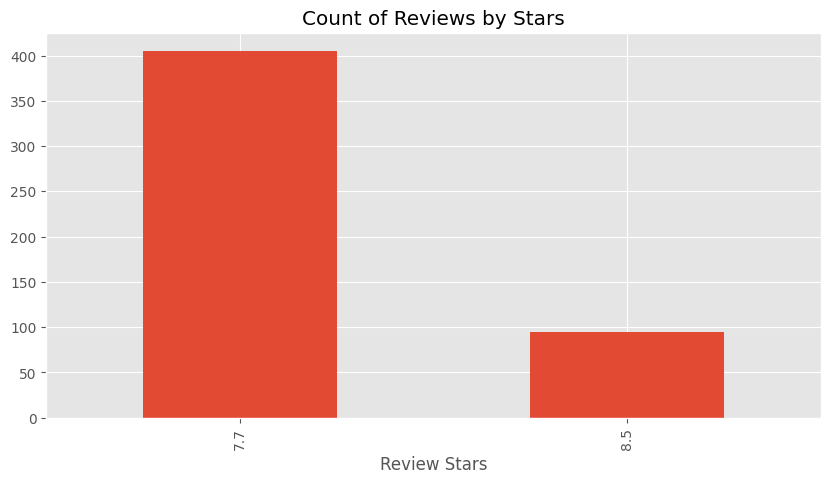

In [58]:
ax = df['Average_Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [59]:
example = df['Negative_Review'][50]
print(example)

 The bar was shut when I got back at midnight which seemed quite early for a hotel bar on a Saturday night in a city like Amsterdam 


In [60]:
  import nltk
  nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The', 'bar', 'was', 'shut', 'when', 'I', 'got', 'back', 'at', 'midnight']

In [62]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [63]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('bar', 'NN'),
 ('was', 'VBD'),
 ('shut', 'VBN'),
 ('when', 'WRB'),
 ('I', 'PRP'),
 ('got', 'VBD'),
 ('back', 'RB'),
 ('at', 'IN'),
 ('midnight', 'NN')]

In [64]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [65]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [66]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  bar/NN
  was/VBD
  shut/VBN
  when/WRB
  I/PRP
  got/VBD
  back/RB
  at/IN
  midnight/NN
  which/WDT
  seemed/VBD
  quite/RB
  early/JJ
  for/IN
  a/DT
  hotel/NN
  bar/NN
  on/IN
  a/DT
  Saturday/NNP
  night/NN
  in/IN
  a/DT
  city/NN
  like/IN
  (PERSON Amsterdam/NNP))


# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

Usaremos el SentimentIntensity Analalz de NLTK para obtener las puntuaciones NEG/Neu/POS del texto.

Esto usa un enfoque de "bolsa de palabras":
Detener las palabras se eliminan
Cada palabra se califica y se combina a una puntuación total.

In [67]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [69]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [70]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [71]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3612}

In [72]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    # Check if 'Text' column exists, otherwise use a different column name
    text_column = 'Negative_Review'  # Default column name
    if text_column not in df.columns:
        # If 'Text' is not found, try alternative column names
        # Replace with the actual column name if you know it
        # For example:
        # text_column = 'hotel_text'
        # Or find the correct column using:
        # text_column = df.columns[df.columns.str.contains('text', case=False)].iloc[0] # Find a column containing "text"
        print(f"Warning: 'Text' column not found. Using '{text_column}' instead.")

    text = row[text_column]
    myid = row['Hotel_Name']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [73]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row[text_column]
    myid = row['Hotel_Name']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [74]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Hotel_Name'}) # Rename 'index' to 'Hotel_Name' for merging
vaders = vaders.merge(df, on='Hotel_Name', how='left') # Specify 'Hotel_Name' as the common column

In [75]:
# Now we have sentiment score and metadata
vaders.head()

,Hotel_Name,neg,neu,pos,compound,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Reviewer_Nationality,...,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Hotel Arena,1.0,0.0,0.0,-0.7096,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Russia,...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,Hotel Arena,1.0,0.0,0.0,-0.7096,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Ireland,...,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,Hotel Arena,1.0,0.0,0.0,-0.7096,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Australia,...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,Hotel Arena,1.0,0.0,0.0,-0.7096,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,United Kingdom,...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,Hotel Arena,1.0,0.0,0.0,-0.7096,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,New Zealand,...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


## Plot VADER results

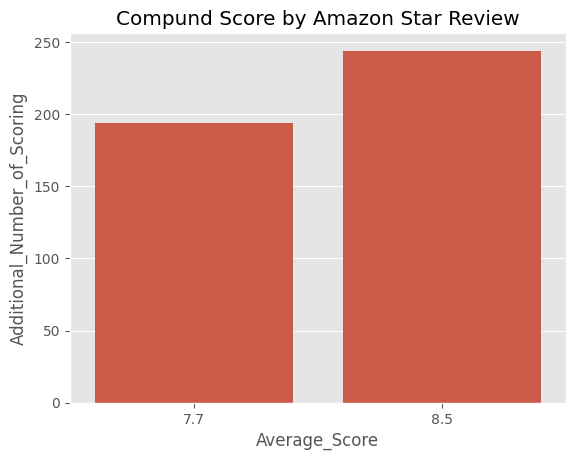

In [76]:
ax = sns.barplot(data=vaders, x='Average_Score', y='Additional_Number_of_Scoring')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

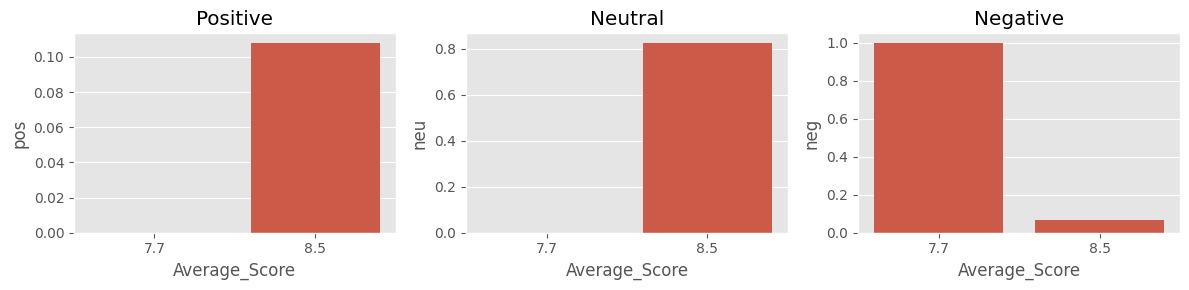

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Average_Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Average_Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Average_Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

Use un modelo entrenado de un gran corpus de datos.
El modelo de transformador explica las palabras pero también el contexto relacionado con otras palabras.

In [78]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [79]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [52]:
# VADER results on example
print(example)
sia.polarity_scores(example)

 The bar was shut when I got back at midnight which seemed quite early for a hotel bar on a Saturday night in a city like Amsterdam 


{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3612}

In [80]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.26604965, 'roberta_neu': 0.6296011, 'roberta_pos': 0.10434921}


In [81]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [84]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        # Convert 'Average_Score' to string before sentiment analysis
        text = str(row['Average_Score'])
        myid = row['Additional_Number_of_Scoring']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [87]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Additional_Number_of_Scoring'}) # Rename 'index' to 'Additional_Number_of_Scoring'
results_df = results_df.merge(df, on='Additional_Number_of_Scoring', how='left') # Merge on 'Additional_Number_of_Scoring'

## Compare Scores between models

In [88]:
results_df.columns

Index(['Additional_Number_of_Scoring', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'Hotel_Address', 'Review_Date', 'Average_Score', 'Hotel_Name',
       'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

# Step 3. Combine and compare

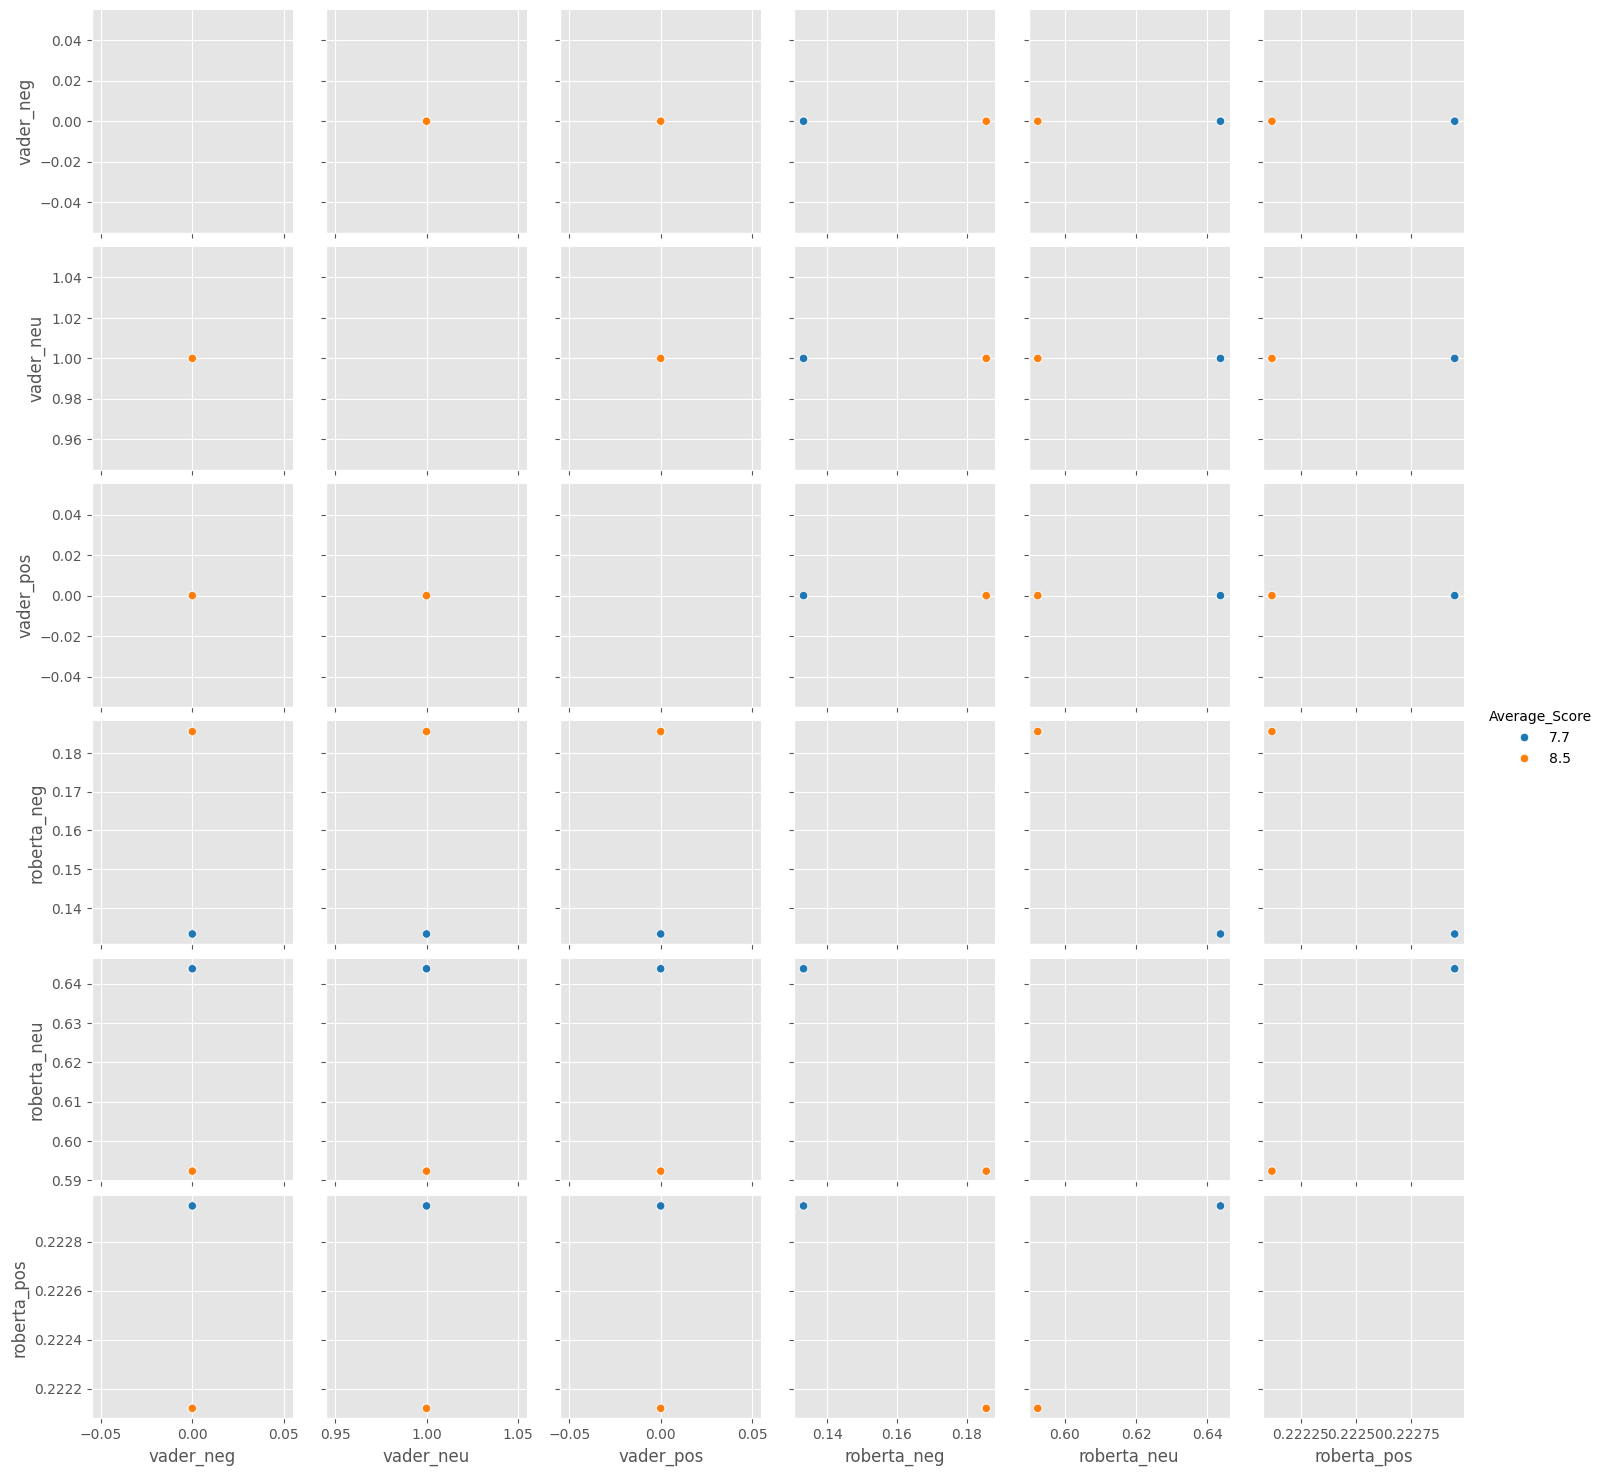

In [90]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Average_Score',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [93]:
results_df.query('Average_Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Average_Score'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [94]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

UndefinedVariableError: name 'Score' is not defined

In [ ]:
# nevative sentiment 5-Star view

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

# Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline('Make sure to like and subscribe!')

In [ ]:
sent_pipeline('booo')

# The End